# Numerical Simulation of a Physical System

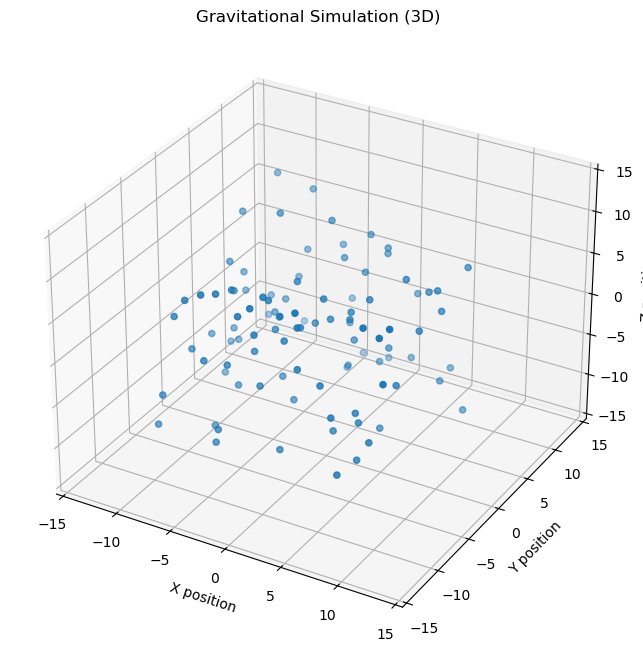

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Constants
G = 6.67430e-11  # gravitational constant
dt = 0.01  # time step

# Simulation parameters
num_particles = 100
num_steps = 1000

# Initialize particle positions, velocities, masses
positions_grav = np.random.uniform(-10, 10, size=(num_particles, 3))
velocities_grav = np.zeros_like(positions_grav)
masses_grav = np.ones(num_particles) * 10.0  # example masses

# Initialize global variables for gravitational simulation
forces_grav = np.zeros_like(positions_grav)

# Function to calculate gravitational forces between particles
def calculate_grav_forces(positions, masses):
    forces = np.zeros_like(positions)
    for i in range(num_particles):
        for j in range(num_particles):
            if i != j:
                r = positions[j] - positions[i]
                r_norm = np.linalg.norm(r)
                force = G * masses[i] * masses[j] / r_norm**2 * r / r_norm
                forces[i] += force
    return forces

# Verlet integration step for gravitational simulation
def verlet_step_grav(positions, velocities, forces, masses, dt):
    new_positions = positions + velocities * dt + 0.5 * forces / masses[:, np.newaxis] * dt**2
    new_forces = calculate_grav_forces(new_positions, masses)
    new_velocities = velocities + 0.5 * (forces + new_forces) / masses[:, np.newaxis] * dt
    return new_positions, new_velocities, new_forces

# Function to update gravitational simulation plot with trajectories and velocity arrows
def update_grav(frame):
    global positions_grav, velocities_grav, forces_grav
    positions_grav, velocities_grav, forces_grav = verlet_step_grav(positions_grav, velocities_grav, forces_grav, masses_grav, dt)
    scatter_grav._offsets3d = (positions_grav[:, 0], positions_grav[:, 1], positions_grav[:, 2])
    
    # Adding trajectories
    if frame % 10 == 0:  # Add trajectory every 10 frames for visibility
        for i, particle in enumerate(scatter_grav.get_paths()):
            particle = particle.vertices
            ax_grav.plot(particle[:, 0], particle[:, 1], particle[:, 2], color='gray', alpha=0.3)
    
    # Adding velocity arrows
    if frame % 5 == 0:  # Add velocity arrows every 5 frames
        ax_grav.quiver(positions_grav[:, 0], positions_grav[:, 1], positions_grav[:, 2],
                       velocities_grav[:, 0], velocities_grav[:, 1], velocities_grav[:, 2],
                       color='blue', length=2, normalize=True)
    
    return scatter_grav,

# Initialize gravitational plot
fig_grav = plt.figure(figsize=(10, 8))
ax_grav = fig_grav.add_subplot(111, projection='3d')
scatter_grav = ax_grav.scatter(positions_grav[:, 0], positions_grav[:, 1], positions_grav[:, 2])

# Animation for gravitational simulation
ani_grav = FuncAnimation(fig_grav, update_grav, frames=num_steps, interval=50)
ax_grav.set_xlim(-15, 15)
ax_grav.set_ylim(-15, 15)
ax_grav.set_zlim(-15, 15)
ax_grav.set_title('Gravitational Simulation (3D)')
ax_grav.set_xlabel('X position')
ax_grav.set_ylabel('Y position')
ax_grav.set_zlabel('Z position')

plt.show()


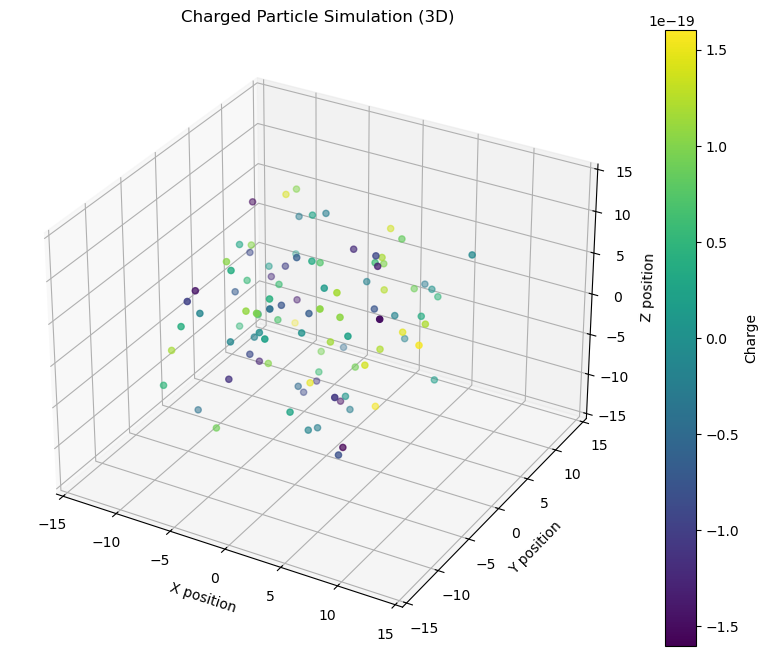

In [15]:
# Simulation parameters
num_particles = 100
num_steps = 1000
dt = 0.01  # time step

# Initialize particle positions, velocities, charges
positions_charge = np.random.uniform(-10, 10, size=(num_particles, 3))
velocities_charge = np.zeros_like(positions_charge)
charges = np.random.uniform(-1, 1, size=num_particles) * q  # example charges

# Initialize global variables for charged particle simulation
forces_charge = np.zeros_like(positions_charge)

# Function to calculate electrostatic forces between charged particles
def calculate_charge_forces(positions, charges):
    forces = np.zeros_like(positions)
    for i in range(num_particles):
        for j in range(num_particles):
            if i != j:
                r = positions[j] - positions[i]
                r_norm = np.linalg.norm(r)
                force = k * charges[i] * charges[j] / r_norm**2 * r / r_norm
                forces[i] += force
    return forces

# Verlet integration step for charged particle simulation
def verlet_step_charge(positions, velocities, forces, charges, dt):
    new_positions = positions + velocities * dt + 0.5 * forces / charges[:, np.newaxis] * dt**2
    new_forces = calculate_charge_forces(new_positions, charges)
    new_velocities = velocities + 0.5 * (forces + new_forces) / charges[:, np.newaxis] * dt
    return new_positions, new_velocities, new_forces

# Function to update charged particle simulation plot with trajectories and velocity arrows
def update_charge(frame):
    global positions_charge, velocities_charge, forces_charge
    positions_charge, velocities_charge, forces_charge = verlet_step_charge(positions_charge, velocities_charge, forces_charge, charges, dt)
    scatter_charge._offsets3d = (positions_charge[:, 0], positions_charge[:, 1], positions_charge[:, 2])
    
    # Adding trajectories
    if frame % 10 == 0:  # Add trajectory every 10 frames for visibility
        for i, particle in enumerate(scatter_charge.get_paths()):
            particle = particle.vertices
            ax_charge.plot(particle[:, 0], particle[:, 1], particle[:, 2], color='gray', alpha=0.3)
    
    # Adding velocity arrows
    if frame % 5 == 0:  # Add velocity arrows every 5 frames
        ax_charge.quiver(positions_charge[:, 0], positions_charge[:, 1], positions_charge[:, 2],
                         velocities_charge[:, 0], velocities_charge[:, 1], velocities_charge[:, 2],
                         color='blue', length=2, normalize=True)
    
    return scatter_charge,

# Initialize charged particle plot
fig_charge = plt.figure(figsize=(10, 8))
ax_charge = fig_charge.add_subplot(111, projection='3d')
scatter_charge = ax_charge.scatter(positions_charge[:, 0], positions_charge[:, 1], positions_charge[:, 2], c=charges, cmap='viridis', vmin=-q, vmax=q)

# Add color bar to indicate charge intensity
cbar = fig_charge.colorbar(scatter_charge)
cbar.set_label('Charge')

# Animation for charged particle simulation
ani_charge = FuncAnimation(fig_charge, update_charge, frames=num_steps, interval=50)
ax_charge.set_xlim(-15, 15)
ax_charge.set_ylim(-15, 15)
ax_charge.set_zlim(-15, 15)
ax_charge.set_title('Charged Particle Simulation (3D)')
ax_charge.set_xlabel('X position')
ax_charge.set_ylabel('Y position')
ax_charge.set_zlabel('Z position')

plt.show()

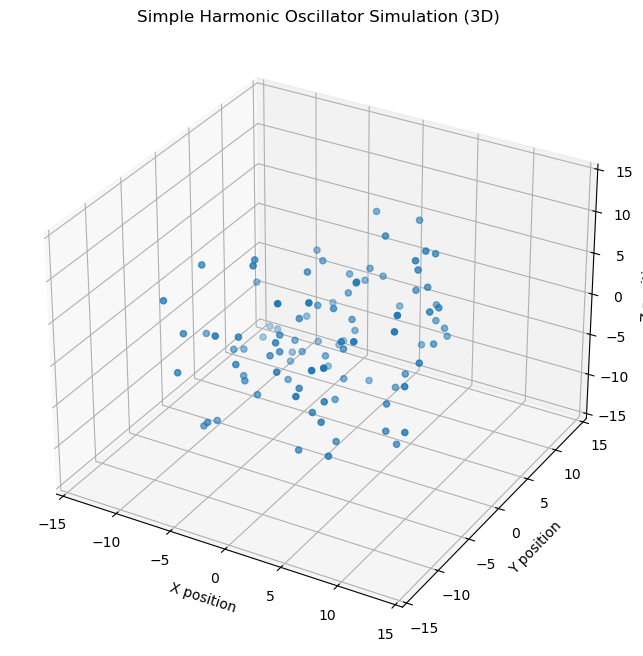

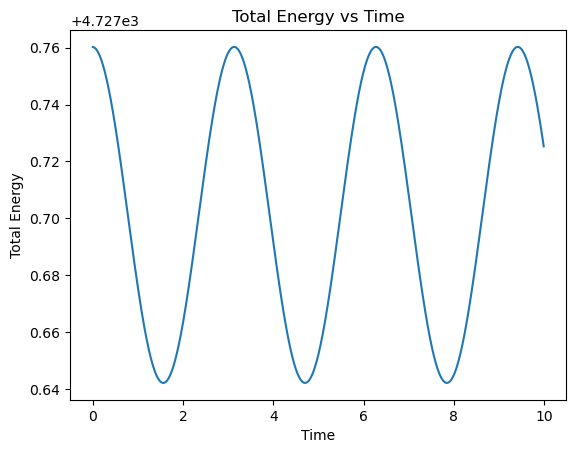

In [16]:
# Simulation parameters
num_particles = 100
num_steps = 1000
dt = 0.01  # time step

# Initialize particle positions, velocities, masses (SHO)
positions_sho = np.random.uniform(-10, 10, size=(num_particles, 3))
velocities_sho = np.zeros_like(positions_sho)
masses = np.ones(num_particles) * m_sho

# Function to calculate forces for simple harmonic oscillator
def calculate_sho_forces(positions, masses):
    return -k_sho * positions

# Verlet integration step for simple harmonic oscillator
def verlet_step_sho(positions, velocities, forces, masses, dt):
    if forces is None:
        forces = calculate_sho_forces(positions, masses)
    
    new_positions = positions + velocities * dt + 0.5 * forces / masses[:, np.newaxis] * dt**2
    new_forces = calculate_sho_forces(new_positions, masses)
    new_velocities = velocities + 0.5 * (forces + new_forces) / masses[:, np.newaxis] * dt
    return new_positions, new_velocities, new_forces

# Function to update simple harmonic oscillator plot with trajectories and energy
def update_sho(frame):
    global positions_sho, velocities_sho
    positions_sho, velocities_sho, _ = verlet_step_sho(positions_sho, velocities_sho, None, masses, dt)
    scatter_sho._offsets3d = (positions_sho[:, 0], positions_sho[:, 1], positions_sho[:, 2])
    
    # Adding trajectories
    if frame % 10 == 0:  # Add trajectory every 10 frames for visibility
        for i, particle in enumerate(scatter_sho.get_paths()):
            particle = particle.vertices
            ax_sho.plot(particle[:, 0], particle[:, 1], particle[:, 2], color='gray', alpha=0.3)
    
    return scatter_sho,

# Initialize simple harmonic oscillator plot
fig_sho = plt.figure(figsize=(10, 8))
ax_sho = fig_sho.add_subplot(111, projection='3d')
scatter_sho = ax_sho.scatter(positions_sho[:, 0], positions_sho[:, 1], positions_sho[:, 2])

# Animation for simple harmonic oscillator simulation
ani_sho = FuncAnimation(fig_sho, update_sho, frames=num_steps, interval=50)
ax_sho.set_xlim(-15, 15)
ax_sho.set_ylim(-15, 15)
ax_sho.set_zlim(-15, 15)
ax_sho.set_title('Simple Harmonic Oscillator Simulation (3D)')
ax_sho.set_xlabel('X position')
ax_sho.set_ylabel('Y position')
ax_sho.set_zlabel('Z position')

# Function to calculate kinetic energy
def calculate_kinetic_energy(velocities, masses):
    return 0.5 * np.sum(masses * np.linalg.norm(velocities, axis=1)**2)

# Function to calculate potential energy (SHO)
def calculate_potential_energy(positions):
    return 0.5 * k_sho * np.sum(positions**2)

# Calculate and plot energies
energies_sho = np.zeros(num_steps)
for i in range(num_steps):
    positions_sho, velocities_sho, _ = verlet_step_sho(positions_sho, velocities_sho, None, masses, dt)
    kinetic_energy = calculate_kinetic_energy(velocities_sho, masses)
    potential_energy = calculate_potential_energy(positions_sho)
    total_energy = kinetic_energy + potential_energy
    energies_sho[i] = total_energy

plt.figure()
plt.plot(np.arange(num_steps) * dt, energies_sho)
plt.title('Total Energy vs Time')
plt.xlabel('Time')
plt.ylabel('Total Energy')

# Show the animation and energy plot
plt.show()
